In [7]:
dist_vecs = []
hgt_cost = [10,20,30,40,50,60,70,80,90]
import matplotlib.pylab as plt
import numpy as np

In [8]:
for T in hgt_cost:
    vec = []
    for line in open("results_nleaves50_nruns100_nreconcruns1_T"+str(T)).readlines():
        if line.find("total weight") >= 0:
            weight = float(line.split(" ")[-1].rstrip('\n'))
        if line.find("distance") >= 0:
            distance = float(line.split(" ")[3])
            if weight==0:
                vec.append(0.)
            else:
                vec.append(distance/weight)
    dist_vecs.append(vec)

In [9]:
means = []
stds = []
for vec in dist_vecs:
    means.append(np.mean(vec))
    stds.append(np.std(vec)/np.sqrt(len(vec)))

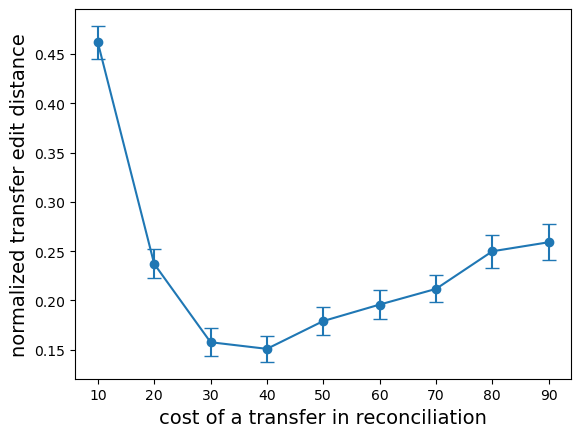

In [13]:
plt.errorbar(hgt_cost, means, yerr=stds, capsize=5,fmt='o-')
plt.xlabel("cost of a transfer in reconciliation",fontsize=14)
plt.ylabel("normalized transfer edit distance",fontsize=14)
plt.savefig("finding_best_transfer_cost.pdf")